In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df=pd.read_csv("SampleSuperstore.csv")

In [3]:
df.head()

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

In [4]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
df.drop(columns=['Country'],inplace=True)
df

Ship Mode    Segment             City       State  Postal Code  \
0       Second Class   Consumer        Henderson    Kentucky        42420   
1       Second Class   Consumer        Henderson    Kentucky        42420   
2       Second Class  Corporate      Los Angeles  California        90036   
3     Standard Class   Consumer  Fort Lauderdale     Florida        33311   
4     Standard Class   Consumer  Fort Lauderdale     Florida        33311   
...              ...        ...              ...         ...          ...   
9989    Second Class   Consumer            Miami     Florida        33180   
9990  Standard Class   Consumer       Costa Mesa  California        92627   
9991  Standard Class   Consumer       Costa Mesa  California        92627   
9992  Standard Class   Consumer       Costa Mesa  California        92627   
9993    Second Class   Consumer      Westminster  California        92683   

     Region         Category Sub-Category     Sales  Quantity  Discount  \
0     South        Furniture    Bookcases  261.9600         2      0.00   
1     South        Furniture       Chairs  731.9400         3      0.00   
2      West  Office Supplies       Labels   14.6200         2      0.00   
3     South        Furniture       Tables  957.5775         5      0.45   
4     South  Office Supplies      Storage   22.3680         2      0.20   
...     ...              ...          ...       ...       ...       ...   
9989  South        Furniture  Furnishings   25.2480         3      0.20   
9990   West        Furniture  Furnishings   91.9600         2      0.00   
9991   West       Technology       Phones  258.5760         2      0.20   
9992   West  Office Supplies        Paper   29.6000         4      0.00   
9993   West  Office Supplies   Appliances  243.1600         2      0.00   

        Profit  
0      41.9136  
1     219.5820  
2       6.8714  
3    -383.0310  
4       2.5164  
...        ...  
9989    4.1028  
9990   15.6332  
9991   19.3932  
9992   13.3200  
9993   72.9480  

[9994 rows x 12 columns]

In [7]:
df.describe()

Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000

<AxesSubplot:xlabel='Category', ylabel='count'>

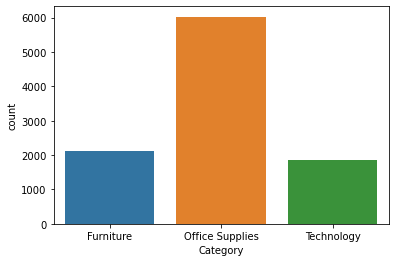

In [8]:
import seaborn as sns
sns.countplot(x=df['Category'])

<AxesSubplot:xlabel='State', ylabel='count'>

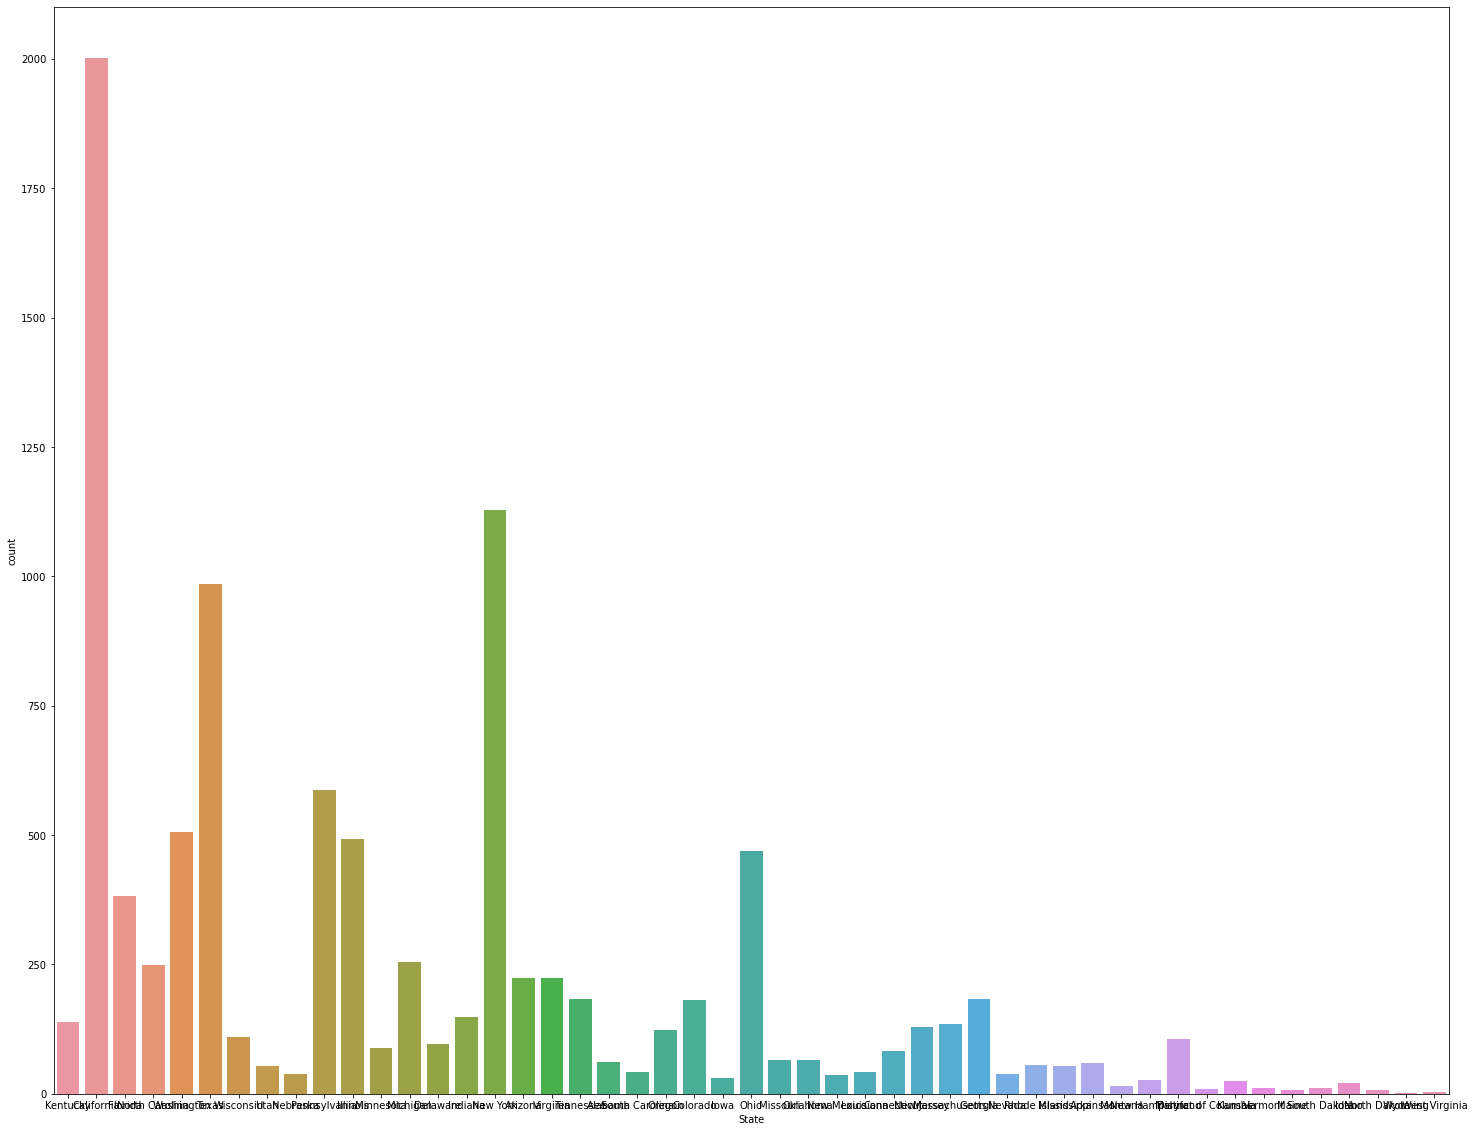

In [11]:
plt.figure(figsize=(25,20))
sns.countplot(x=df['State'])

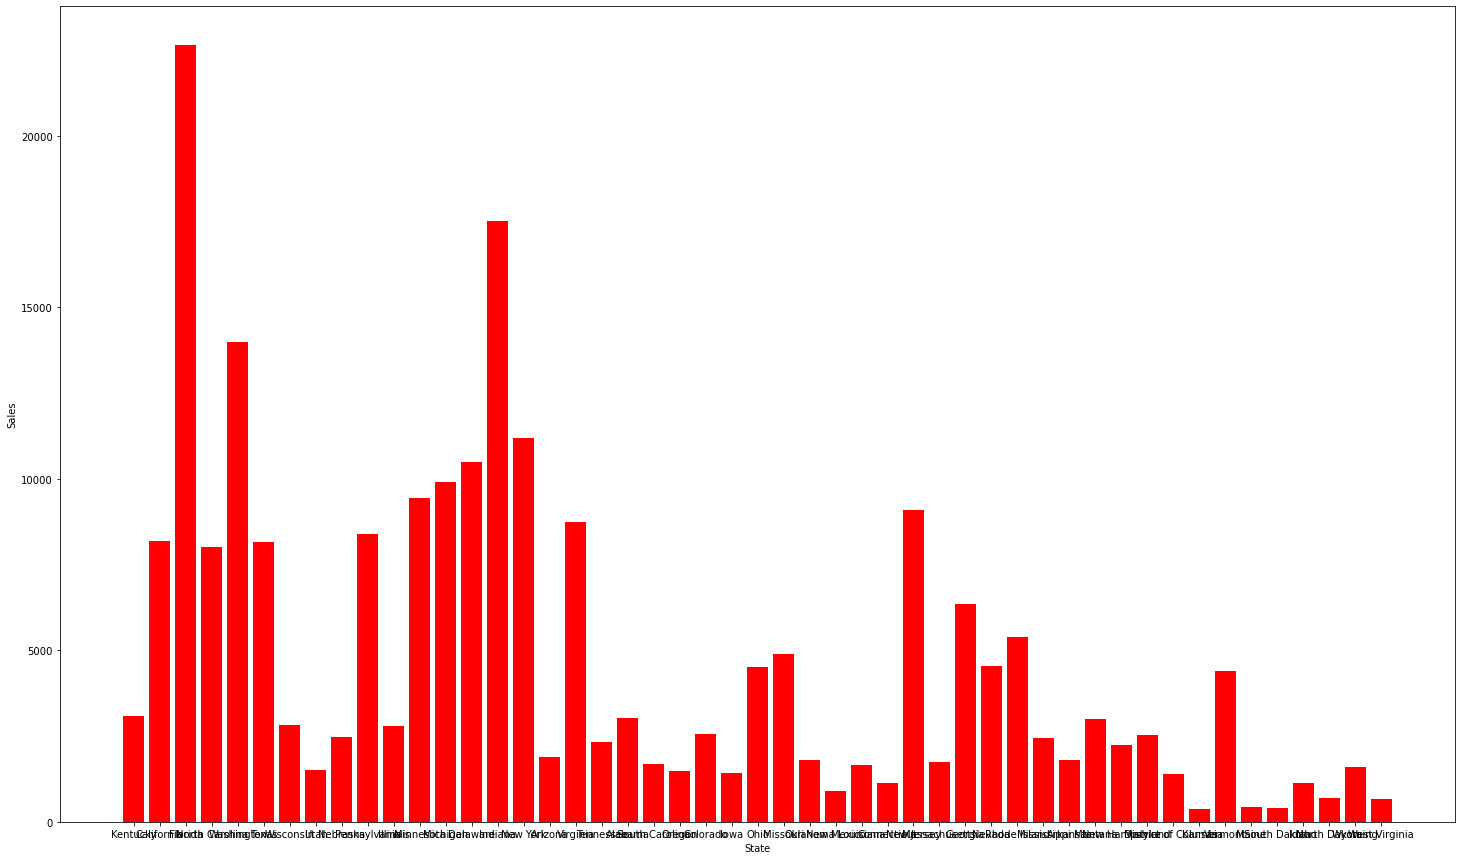

In [14]:
import matplotlib.pyplot as plt

X=df['State']
y=df['Sales']

plt.figure(figsize=(25,15))
plt.bar(X,y,color='red')
plt.xlabel("State")
plt.ylabel("Sales")
plt.show()

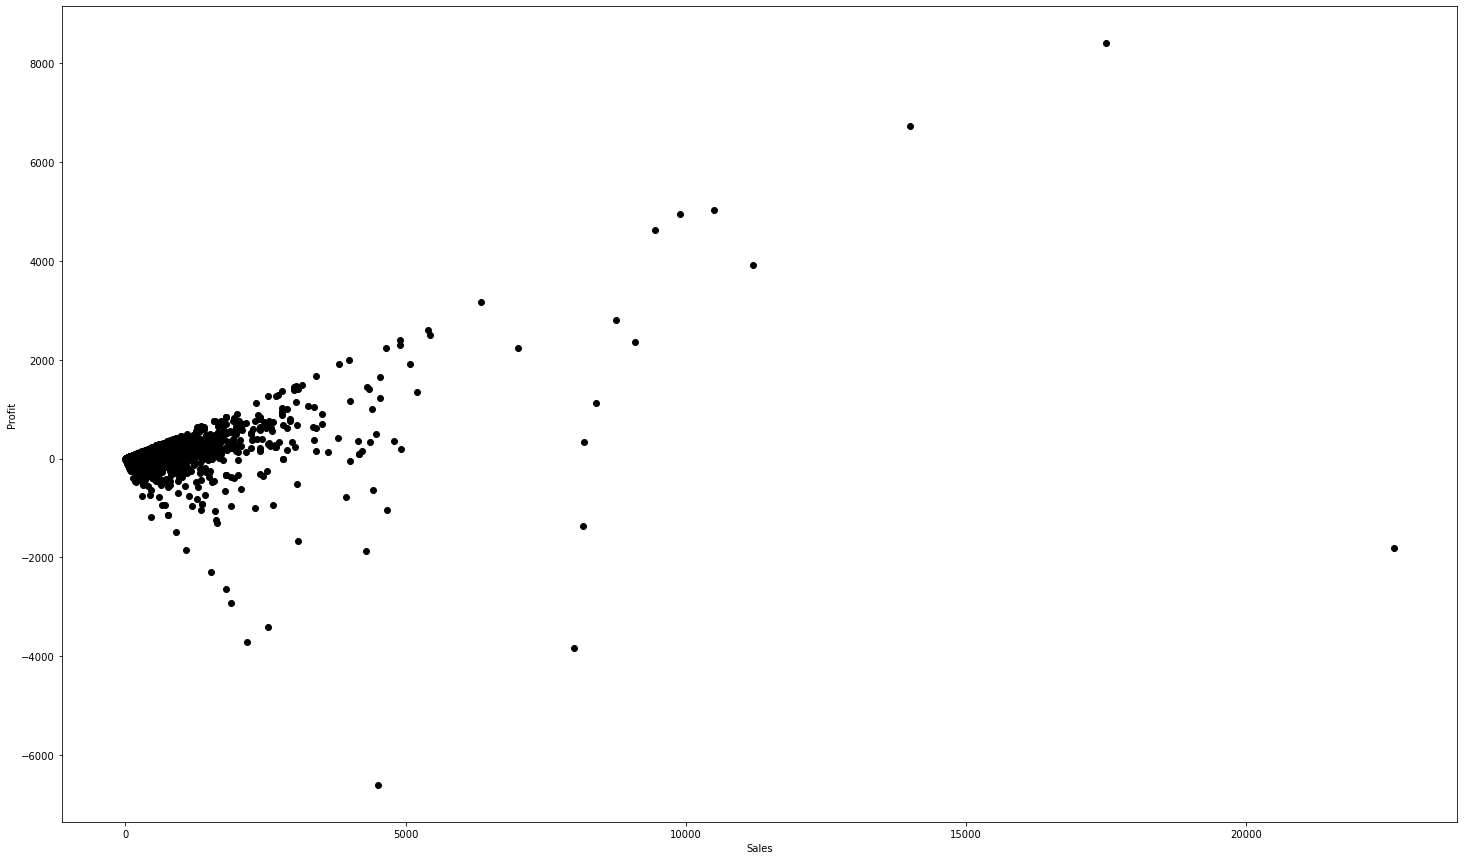

In [17]:
X=df['Sales']
y=df['Profit']
plt.figure(figsize=(25,15))
plt.scatter(X,y,color='black')
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()

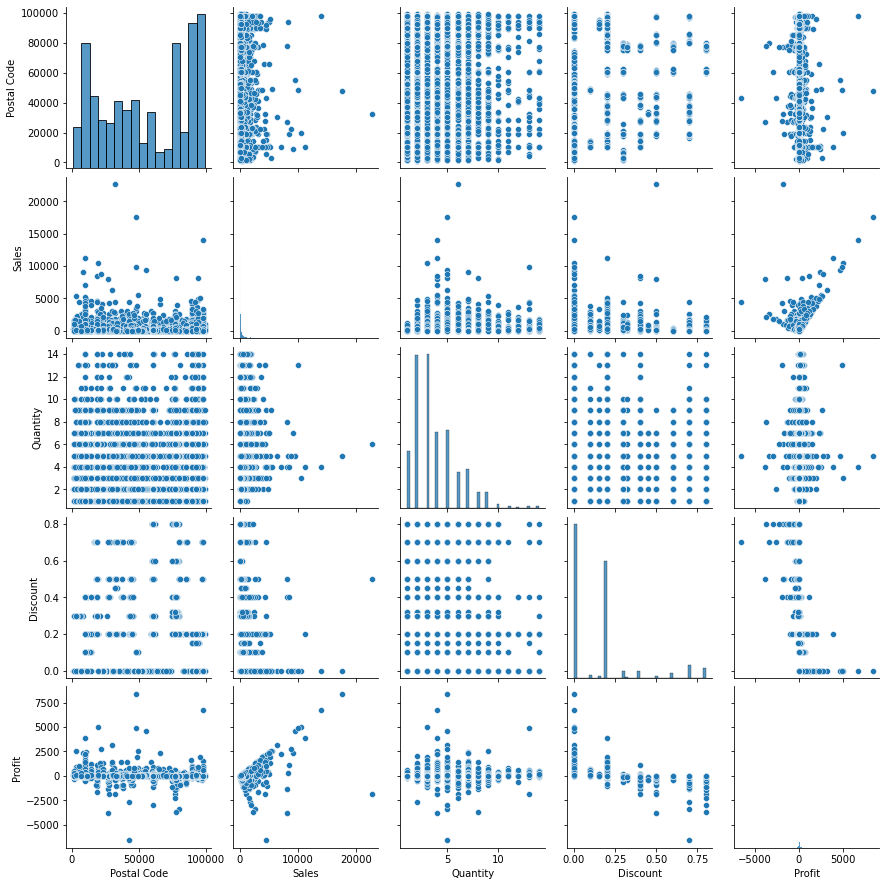

In [18]:
import seaborn as sns
sns.pairplot(df)

In [20]:
correlation=df.corr()
correlation

Postal Code     Sales  Quantity  Discount    Profit
Postal Code     1.000000 -0.023854  0.012761  0.058443 -0.029961
Sales          -0.023854  1.000000  0.200795 -0.028190  0.479064
Quantity        0.012761  0.200795  1.000000  0.008623  0.066253
Discount        0.058443 -0.028190  0.008623  1.000000 -0.219487
Profit         -0.029961  0.479064  0.066253 -0.219487  1.000000

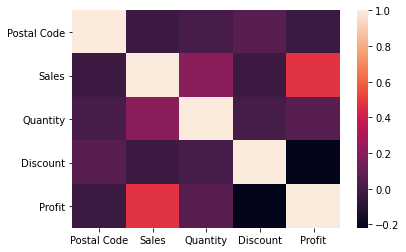

In [22]:
sns.heatmap(df.corr())
plt.show()

In [24]:
filtering_data=(df['Sales']<229.858001) & (df['Profit']<28.656896)

In [25]:
df[filtering_data]

Ship Mode    Segment             City       State  Postal Code  \
2       Second Class  Corporate      Los Angeles  California        90036   
4     Standard Class   Consumer  Fort Lauderdale     Florida        33311   
5     Standard Class   Consumer      Los Angeles  California        90032   
6     Standard Class   Consumer      Los Angeles  California        90032   
8     Standard Class   Consumer      Los Angeles  California        90032   
...              ...        ...              ...         ...          ...   
9985  Standard Class   Consumer       Long Beach    New York        11561   
9986  Standard Class   Consumer      Los Angeles  California        90008   
9989    Second Class   Consumer            Miami     Florida        33180   
9990  Standard Class   Consumer       Costa Mesa  California        92627   
9992  Standard Class   Consumer       Costa Mesa  California        92627   

     Region         Category Sub-Category   Sales  Quantity  Discount   Profit  
2      West  Office Supplies       Labels  14.620         2       0.0   6.8714  
4     South  Office Supplies      Storage  22.368         2       0.2   2.5164  
5      West        Furniture  Furnishings  48.860         7       0.0  14.1694  
6      West  Office Supplies          Art   7.280         4       0.0   1.9656  
8      West  Office Supplies      Binders  18.504         3       0.2   5.7825  
...     ...              ...          ...     ...       ...       ...      ...  
9985   East  Office Supplies     Supplies  55.600         4       0.0  16.1240  
9986   West       Technology  Accessories  36.240         1       0.0  15.2208  
9989  South        Furniture  Furnishings  25.248         3       0.2   4.1028  
9990   West        Furniture  Furnishings  91.960         2       0.0  15.6332  
9992   West  Office Supplies        Paper  29.600         4       0.0  13.3200  

[6618 rows x 12 columns]